In [ ]:
import gdown

url = "https://drive.google.com/drive/folders/13BToI5XE-dFtgOyGsZ-SLx91J_GGmMFE?usp=share_link"
folder_name = "datasets"
gdown.download_folder(url, output=folder_name)

train_path = "/content/datasets/train.csv"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Обработаем данные

In [10]:
train = pd.read_csv(train_path)

In [11]:
print(f'Train set shape : {train.shape}')
train.head(2)

Train set shape : (44638, 29)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09


In [12]:
train.isna().sum().sort_values(ascending=False).head()

hotel                          0
distribution_channel           0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

In [15]:
train.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,44638.000000,44638.000000,44638.00000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000
mean,0.297594,99.395291,2016.15675,27.095166,15.778328,0.931516,2.507303,1.852883,0.102424,0.008289,0.034052,0.069672,0.140799,0.238026,2.149133,101.624687,0.067723,0.603253
std,0.457205,104.485734,0.70504,13.654692,8.807604,1.002021,1.928111,0.578898,0.393273,0.091649,0.181364,0.726281,1.540109,0.682989,17.134385,48.429930,0.255077,0.803659
min,0.000000,0.000000,2015.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,2016.00000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.380000,0.000000,0.000000
50%,0.000000,65.000000,2016.00000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,0.000000,0.000000
75%,1.000000,154.000000,2017.00000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.00000,53.000000,31.000000,16.000000,40.000000,55.000000,3.000000,2.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


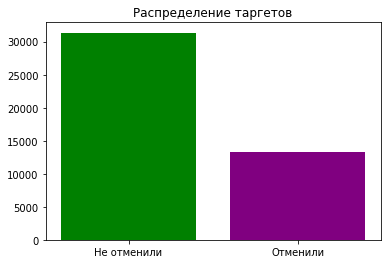

In [16]:
plt.bar(train['is_canceled'].unique(), train['is_canceled'].value_counts(), tick_label = ['Не отменили', 'Отменили'], color=['green', 'purple'])
plt.title('Распределение таргетов')
plt.show()

## Категоризируем данные

In [17]:
object_type_columns = train.loc[:, train.dtypes == object].columns
object_type_columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status_date'],
      dtype='object')

In [18]:
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'deposit_type', 'customer_type']

In [19]:
from sklearn import preprocessing

In [20]:
for column in categorical_columns:
  le = preprocessing.LabelEncoder()
  train[column] = le.fit_transform(train[column])

In [22]:
train = train.drop(train.loc[:, train.dtypes == object].columns, axis=1)

In [23]:
print(f'Train set shape : {train.shape}')
train.info()

Train set shape : (44638, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  int64  
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  int64  
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  me

## Разделим на train, test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
def split_dataset(dataset):
  features_train, features_test, targets_train, targets_test = train_test_split(dataset.drop(['is_canceled'], axis=1), dataset['is_canceled'], test_size=0.2, random_state=5)
  return features_train, targets_train, features_test, targets_test

# Рассмотрим подходы

In [26]:
from sklearn.metrics import accuracy_score

In [33]:
def analyze_model(model, dataset):
  x_train, y_train, x_test, y_test = dataset
  """Возвращает обученную модель, MSE"""
  model.fit(x_train, y_train)

  predictions = model.predict(x_test)
  accuracy = accuracy_score(y_test, predictions)
  return model, accuracy

def get_result(model, accuracy, kaggle_features, title):
  """Скачивает csv с predictions"""
  predictions = model.predict(kaggle_features)
  result = pd.DataFrame(predictions, columns=['is_canceled']).reset_index()
  result.to_csv(f"({round(accuracy, 3)}) {title}.csv", index=False)
  files.download(f"({round(accuracy, 3)}) {title}.csv")

## Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression(penalty='elasticnet', l1_ratio=1, solver='saga', max_iter=5000)
model_LogisticRegression, accuracy_LogisticRegression = analyze_model(LogisticRegression, split_dataset(train))
print(f'LogisticRegression accuracy : {accuracy_LogisticRegression}')

LogisticRegression accuracy : 0.7823700716845878


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
#get_result(model_LogisticRegression, accuracy_LogisticRegression, kaggletest, 'LogisticRegression')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Испытаем интуицию

In [ ]:
supposed_features = ['deposit_type','is_repeated_guest',\
                     'previous_bookings_not_canceled', 'previous_cancellations']

In [ ]:
heuristic_kaggletest = kaggletest[supposed_features]

In [ ]:
supposed_features.append('is_canceled')
heuristic_train = train[supposed_features]

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression(max_iter=10000)
model_LogisticRegression, accuracy_LogisticRegression = analyze_model(LogisticRegression, split_dataset(heuristic_train))
print(f'LogisticRegression accuracy : {accuracy_LogisticRegression}')

LogisticRegression accuracy : 0.8174283154121864


In [ ]:
#get_result(model_LogisticRegression, accuracy_LogisticRegression, heuristic_kaggletest, 'LogisticRegression')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Нормализуем данные

In [30]:
def normalize_dataset(dataset):
  not_normalized_targets = dataset['is_canceled']
  normalized_dataset = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(dataset.drop(['is_canceled'], axis=1)), columns=dataset.drop(['is_canceled'], axis=1).columns)
  normalized_dataset = pd.concat([normalized_dataset, not_normalized_targets], axis=1)
  return normalized_dataset

In [31]:
normalized_train = normalize_dataset(train)

In [34]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression(penalty='elasticnet', l1_ratio=1, solver='saga', max_iter=5000)
model_LogisticRegression, accuracy_LogisticRegression = analyze_model(LogisticRegression, split_dataset(normalized_train))
print(f'LogisticRegression accuracy : {accuracy_LogisticRegression}')

LogisticRegression accuracy : 0.824260752688172


In [ ]:
get_result(model_LogisticRegression, accuracy_LogisticRegression, kaggletest, 'LogisticRegression')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Проанализируем корреляцию

In [27]:
def columns_to_target_correlation(dataset, target_column='is_canceled'):
  """Возвращает корреляцию dataset c target"""
  correlation = dataset.corr()[target_column]
  correlation.columns=['Сoefficient']
  sorted_correlation = correlation.drop([target_column], axis=0).dropna().sort_values()
  return sorted_correlation

In [28]:
def get_correlating_features(correlation, restriction):
  profitable_features = correlation[(correlation > restriction) | (correlation < -restriction)].index
  return profitable_features

In [35]:
correlation_matrix = normalized_train.corr()

In [36]:
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True
mask[np.triu_indices_from(mask)]= True

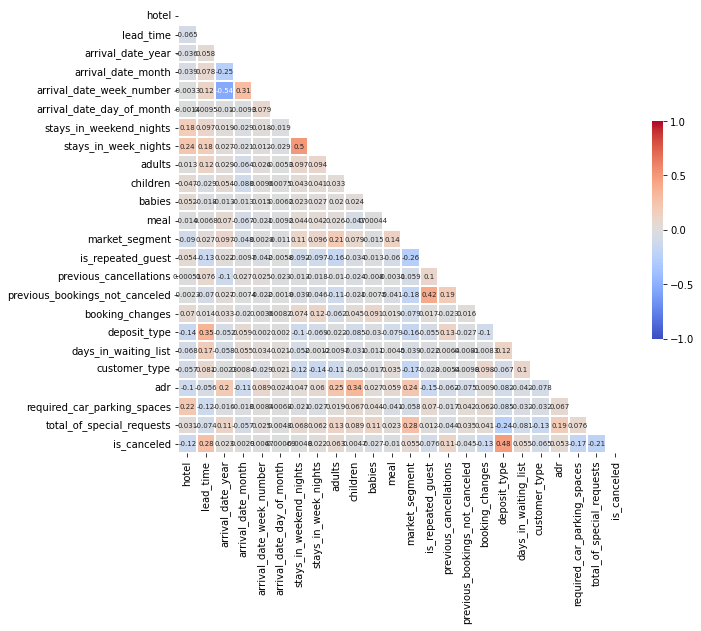

In [37]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(correlation_matrix,
                      mask = mask,
                      square = True,
                      linewidths = 1,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 7})

ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns, rotation = 0)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [38]:
correlation = columns_to_target_correlation(train)
correlation

total_of_special_requests        -0.214533
required_car_parking_spaces      -0.172816
booking_changes                  -0.128918
hotel                            -0.122751
is_repeated_guest                -0.076282
customer_type                    -0.065083
previous_bookings_not_canceled   -0.045350
babies                           -0.027326
meal                             -0.010391
stays_in_weekend_nights          -0.004805
arrival_date_day_of_month        -0.000692
arrival_date_month                0.002875
children                          0.004660
arrival_date_week_number          0.006746
stays_in_week_nights              0.022033
arrival_date_year                 0.023055
adr                               0.052637
days_in_waiting_list              0.055115
market_segment                    0.055386
adults                            0.063338
previous_cancellations            0.113781
lead_time                         0.281050
deposit_type                      0.478948
Name: is_ca